In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#to ignore seaborn warnings
import warnings
warnings.filterwarnings("ignore")

# 1.Loading dataset into python environment

In [3]:
data = pd.read_csv(r"C:\Users\acer\Downloads\titanic_dataset.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.Setting 'PassengerId' as index column

In [5]:
data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3.Checking basic details on the dataset

In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns with missing values --> Age, Cabin, Embarked

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 4.Handling Missing Values

In [11]:
#Percentage of missing values in each columns
data.isna().sum() / data.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

From this we can see that 77% values of column 'Cabin' are missing.
So, there is no meaning on filling the missing values.
We can simply drop this column from the dataset

In [12]:
data = data.drop('Cabin', axis=1)

In [13]:
#Columns with missing values --> Age, Embarked

<AxesSubplot:xlabel='Age'>

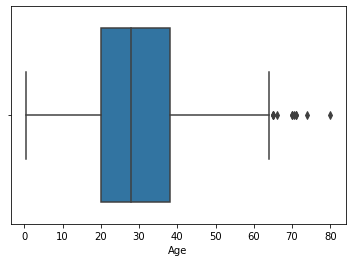

In [14]:
sns.boxplot(data['Age'])

<AxesSubplot:>

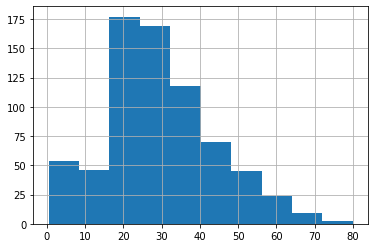

In [15]:
data['Age'].hist()

In [16]:
#data has outliers and is right skewed, so it is better to fill with median
age_median = data['Age'].median()
data['Age'] = data['Age'].fillna(age_median)

In [17]:
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [18]:
#since 'Embarked' is a categorical feature we need to fill it with mode
embarked_mode = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(embarked_mode)

In [19]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 5.Handling Outliers

In [20]:
#outlier columns  --> Age, SibSp, Parch, Fare

In [21]:
#handling outliers using IQR method

In [22]:
#defining a function for IQR
def get_outlier(col):
    sorted_col = sorted(col)
    Q1, Q3 = np.percentile(sorted_col, [25,75])
    IQR = Q3 - Q1
    lb = Q1 - (1.5*IQR)
    ub = Q3 + (1.5*IQR)
    return lb,ub

<AxesSubplot:xlabel='Age'>

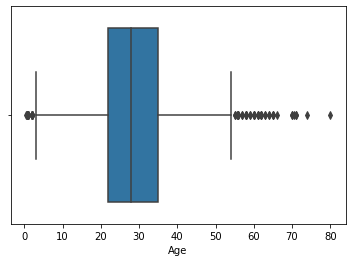

In [23]:
sns.boxplot(data['Age'])

In [24]:
#Age
lb,ub = get_outlier(data['Age'])
data = data.drop(data[(data.Age < lb)|(data.Age > ub)]['Age'].index)

<AxesSubplot:xlabel='Age'>

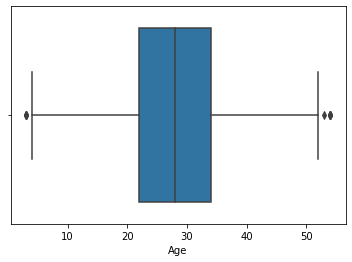

In [25]:
sns.boxplot(data['Age'])

<AxesSubplot:xlabel='SibSp'>

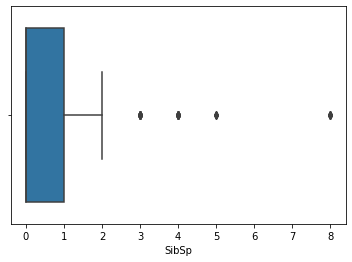

In [26]:
sns.boxplot(data['SibSp'])

In [27]:
#SibSp
lb,ub = get_outlier(data['SibSp'])
data = data.drop(data[(data['SibSp'] < lb)|(data['SibSp'] > ub)]['SibSp'].index)

<AxesSubplot:xlabel='SibSp'>

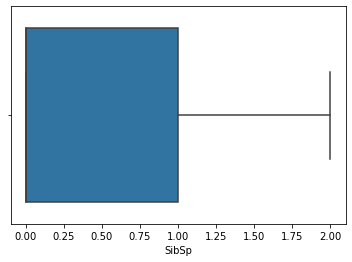

In [28]:
sns.boxplot(data['SibSp'])

<AxesSubplot:xlabel='Fare'>

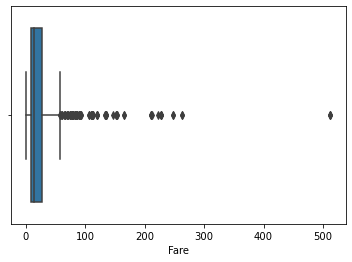

In [29]:
sns.boxplot(data['Fare'])

In [30]:
#Fare
lb,ub = get_outlier(data['Fare'])
data = data.drop(data[(data['Fare'] < lb)|(data['Fare'] > ub)]['Fare'].index)

<AxesSubplot:xlabel='Fare'>

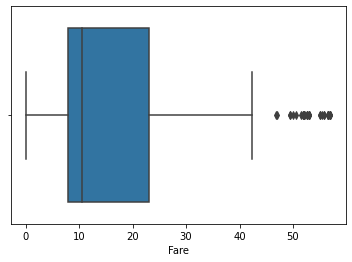

In [31]:
sns.boxplot(data['Fare'])

In [32]:
data['Parch'].value_counts() / data.shape[0] * 100

0    84.064327
1     9.502924
2     4.385965
5     0.730994
3     0.730994
4     0.438596
6     0.146199
Name: Parch, dtype: float64

here we can see 76% values of column 'Parch' is 0, so we can simply drop the column

In [33]:
data = data.drop('Parch', axis=1)

In [34]:
data.shape

(684, 10)

# 6.Scaling feature set using MinMaxScaling

In [35]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [36]:
#we can drop 'Ticket' column and also 'Name' as it is not that much important
data = data.drop(['Ticket', 'Name'], axis=1)

In [37]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare',
       'Embarked'],
      dtype='object')

In [38]:
num_cols = ['Pclass', 'Age', 'SibSp', 'Fare']

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
data[num_cols] = scaler.fit_transform(data[num_cols])

In [42]:
data[num_cols].describe()

,Pclass,Age,SibSp,Fare
count,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.502207,0.135965,0.286268
std,0.357408,0.185072,0.250491,0.221255
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.137793
50%,1.000000,0.490196,0.000000,0.184211
75%,1.000000,0.588235,0.000000,0.404605
max,1.000000,1.000000,1.000000,1.000000


In [43]:
#encode the categorical features using OneHot Encoding

In [44]:
data = pd.get_dummies(data)

In [45]:
X = data.drop('Survived', axis=1) #independent features
y = data['Survived'] #dependent feature

In [46]:
X

,PassengerId,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,1.0,0.372549,0.5,0.127193,0,1,0,0,1
2,3,1.0,0.450980,0.0,0.139035,1,0,0,0,1
3,4,0.0,0.627451,0.5,0.931579,1,0,0,0,1
4,5,1.0,0.627451,0.0,0.141228,0,1,0,0,1
5,6,1.0,0.490196,0.0,0.148391,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0.5,0.470588,0.0,0.228070,0,1,0,0,1
887,888,0.0,0.313725,0.0,0.526316,1,0,0,0,1
888,889,1.0,0.490196,0.5,0.411404,1,0,0,0,1
889,890,0.0,0.450980,0.0,0.526316,0,1,1,0,0


In [47]:
y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 684, dtype: int64